In [31]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))


# 1.기존의 프로그램 방식

-회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html \
-오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)\
    
-
https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62  \
        prediction 예측값, target 실제값
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)

-경사하강법 설명
-https://www.mql5.com/ko/articles/11200

In [4]:
# 섭씨온도 -> 화씨온도 출력
def celsius_to_faherenheit(c):
    return c*1.8+32 

In [6]:
input_c = int(input('섭씨온도 ? '))
print('화씨온도는 ', celsius_to_faherenheit(input_c))

섭씨온도 ? 3
화씨온도는  37.4


# 2. 머신러닝 프로그램 방식
```
※데이터에 결측치가 존재하면 연산(추출)이 불가/ 앞서 결측치 처리,이상치 처리 완료해야 함.

1. 데이터 확보 및 생성
2. 데이터 전처리 : 
        스케일 조정
        훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋으로 분활
3. 모델구성
4. 모델 학습과정 설정
5. 모델 학습시키기 (많이)
6. 모델 평가(시험데이터셋으로)
7. 모델 저장 및 사용(입력값이 주어지면 예측값 받기)
```

## 2.1 노이즈가 없는 데이터로 실습

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 1. 데이터 확보 및 생성 (입력데이터:섭씨,출력데이터:화씨) , 학습하기 위한 값은 numpy값으로 되어있어야 함. 
data_C = np.arange(100) # 0부터 99까지 출력
data_C  # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [10]:
data_F = celsius_to_faherenheit(data_C)
data_F # 종속변수(타겟변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [14]:
# 2. 데이터 전처리 (스케일 조정) : 컴퓨터에게 학습시키기 위해 스케일 조정
# 데이터 편차가 많이 안 나게 정리함 

scaled_data_C = data_C/100.0 #실수데이터로 해야 학습이 잘 됨
scaled_data_F = data_F/100.0 
print('학습시 독립변수 : ', scaled_data_C)
print('학습시 종속변수 : ', scaled_data_F)

학습시 독립변수 :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 종속변수 :  [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688

In [16]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[]

In [18]:
# 3. 모델 구성 
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense, Input #입력값과 출력값으로 Layer층 지정

model = Sequential() #빈모델 생성
# model.add(Input(shape=(1,) ))
# model.add(Dense(1))
# model.add(Dense(input_shape=(1,), # 입력(독립) 변수의 shape
#                1))                # 종속(타켓) 변수의 갯수
model.add(Dense(units=1,            # 종속(타겟) 변수의 개수
               input_shape=(1,)))   # 입력(독립) 변수의 shape
# y= a*x + b

In [21]:
# 4. 모델 학습과정 설정
model.compile(loss="mse",           # 손실함수 : 모델 학습 중 오차 최소화 하기위해 사용
             optimizer="rmsprop",   # 옵티마이저 : 손실함수를 줄이도록 모델의 가중치 조정 
             metrics=['mae'])       # 평가지표 

# mse : 오차 제곱의 평균 (이상치 영향이 상승)
# mae : 오차 절대값의 평균(이상치 영향이 감소)
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
#  학습전 예측 
model.predict(np.array([[0],
                        [0.01]])) # 섭씨온도 0, 1도는 화씨 몇도인가?

1/1 [==============================] - 0s 20ms/step


array([[ 0.        ],
       [-0.01296645]], dtype=float32)

In [32]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [33]:
# 5. 모델 학습시키기 - 1번만 실행
hist = model.fit(scaled_data_C,  # 입력변수 (훈련데이터) 
                 scaled_data_F,  # 타겟변수 (훈련데이터) 종속변수
                 epochs=1000,    # 학습횟수
                 verbose=2)      # 학습시 출력여부 (0:학습내용출력x, 1:출력 대충, 2: 출력 확실히)

Epoch 1/1000
4/4 - 0s - loss: 4.2116 - mae: 1.8480 - 316ms/epoch - 79ms/step
Epoch 2/1000
4/4 - 0s - loss: 4.1639 - mae: 1.8359 - 7ms/epoch - 2ms/step
Epoch 3/1000
4/4 - 0s - loss: 4.1371 - mae: 1.8293 - 6ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 4.1098 - mae: 1.8223 - 5ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 4.0844 - mae: 1.8160 - 7ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 4.0601 - mae: 1.8099 - 7ms/epoch - 2ms/step
Epoch 7/1000
4/4 - 0s - loss: 4.0360 - mae: 1.8037 - 6ms/epoch - 2ms/step
Epoch 8/1000
4/4 - 0s - loss: 4.0118 - mae: 1.7976 - 9ms/epoch - 2ms/step
Epoch 9/1000
4/4 - 0s - loss: 3.9870 - mae: 1.7913 - 7ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 3.9635 - mae: 1.7853 - 7ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 3.9406 - mae: 1.7795 - 8ms/epoch - 2ms/step
Epoch 12/1000
4/4 - 0s - loss: 3.9153 - mae: 1.7729 - 6ms/epoch - 1ms/step
Epoch 13/1000
4/4 - 0s - loss: 3.8946 - mae: 1.7676 - 8ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss: 

Epoch 110/1000
4/4 - 0s - loss: 2.0422 - mae: 1.2102 - 8ms/epoch - 2ms/step
Epoch 111/1000
4/4 - 0s - loss: 2.0259 - mae: 1.2046 - 6ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 2.0077 - mae: 1.1982 - 8ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.9940 - mae: 1.1933 - 8ms/epoch - 2ms/step
Epoch 114/1000
4/4 - 0s - loss: 1.9782 - mae: 1.1878 - 9ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 1.9641 - mae: 1.1829 - 6ms/epoch - 2ms/step
Epoch 116/1000
4/4 - 0s - loss: 1.9502 - mae: 1.1783 - 9ms/epoch - 2ms/step
Epoch 117/1000
4/4 - 0s - loss: 1.9345 - mae: 1.1727 - 8ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 1.9190 - mae: 1.1672 - 7ms/epoch - 2ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.9059 - mae: 1.1626 - 8ms/epoch - 2ms/step
Epoch 120/1000
4/4 - 0s - loss: 1.8925 - mae: 1.1578 - 6ms/epoch - 2ms/step
Epoch 121/1000
4/4 - 0s - loss: 1.8768 - mae: 1.1524 - 13ms/epoch - 3ms/step
Epoch 122/1000
4/4 - 0s - loss: 1.8598 - mae: 1.1464 - 9ms/epoch - 2ms/step
Epoch 123/1

Epoch 218/1000
4/4 - 0s - loss: 0.7705 - mae: 0.7177 - 5ms/epoch - 1ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.7636 - mae: 0.7144 - 8ms/epoch - 2ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.7562 - mae: 0.7111 - 6ms/epoch - 1ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.7492 - mae: 0.7079 - 7ms/epoch - 2ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.7415 - mae: 0.7045 - 6ms/epoch - 1ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.7325 - mae: 0.7003 - 9ms/epoch - 2ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.7247 - mae: 0.6969 - 5ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.7171 - mae: 0.6933 - 6ms/epoch - 1ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.7079 - mae: 0.6891 - 6ms/epoch - 2ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.7007 - mae: 0.6857 - 6ms/epoch - 1ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.6950 - mae: 0.6831 - 6ms/epoch - 2ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.6870 - mae: 0.6794 - 6ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 0s - loss: 0.6800 - mae: 0.6761 - 8ms/epoch - 2ms/step
Epoch 231/10

Epoch 326/1000
4/4 - 0s - loss: 0.2920 - mae: 0.4672 - 7ms/epoch - 2ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.2908 - mae: 0.4662 - 6ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.2891 - mae: 0.4650 - 8ms/epoch - 2ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.2879 - mae: 0.4641 - 6ms/epoch - 2ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.2864 - mae: 0.4629 - 9ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.2852 - mae: 0.4621 - 6ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.2839 - mae: 0.4610 - 6ms/epoch - 2ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.2824 - mae: 0.4599 - 6ms/epoch - 1ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.2807 - mae: 0.4586 - 5ms/epoch - 1ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.2796 - mae: 0.4577 - 7ms/epoch - 2ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.2786 - mae: 0.4569 - 5ms/epoch - 1ms/step
Epoch 337/1000
4/4 - 0s - loss: 0.2775 - mae: 0.4561 - 7ms/epoch - 2ms/step
Epoch 338/1000
4/4 - 0s - loss: 0.2766 - mae: 0.4554 - 6ms/epoch - 2ms/step
Epoch 339/10

Epoch 434/1000
4/4 - 0s - loss: 0.1886 - mae: 0.3755 - 7ms/epoch - 2ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.1879 - mae: 0.3748 - 7ms/epoch - 2ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.1871 - mae: 0.3740 - 6ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.1864 - mae: 0.3733 - 8ms/epoch - 2ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.1856 - mae: 0.3725 - 5ms/epoch - 1ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.1847 - mae: 0.3715 - 10ms/epoch - 2ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.1839 - mae: 0.3707 - 5ms/epoch - 1ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.1830 - mae: 0.3698 - 5ms/epoch - 1ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.1824 - mae: 0.3693 - 8ms/epoch - 2ms/step
Epoch 443/1000
4/4 - 0s - loss: 0.1815 - mae: 0.3683 - 5ms/epoch - 1ms/step
Epoch 444/1000
4/4 - 0s - loss: 0.1807 - mae: 0.3675 - 7ms/epoch - 2ms/step
Epoch 445/1000
4/4 - 0s - loss: 0.1800 - mae: 0.3669 - 6ms/epoch - 2ms/step
Epoch 446/1000
4/4 - 0s - loss: 0.1791 - mae: 0.3660 - 7ms/epoch - 2ms/step
Epoch 447/1

Epoch 542/1000
4/4 - 0s - loss: 0.1101 - mae: 0.2863 - 6ms/epoch - 2ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.1094 - mae: 0.2855 - 7ms/epoch - 2ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.1087 - mae: 0.2846 - 5ms/epoch - 1ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.1081 - mae: 0.2837 - 6ms/epoch - 2ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.1074 - mae: 0.2829 - 5ms/epoch - 1ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.1068 - mae: 0.2821 - 7ms/epoch - 2ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.1061 - mae: 0.2812 - 8ms/epoch - 2ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.1052 - mae: 0.2801 - 5ms/epoch - 1ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.1046 - mae: 0.2792 - 7ms/epoch - 2ms/step
Epoch 551/1000
4/4 - 0s - loss: 0.1040 - mae: 0.2785 - 5ms/epoch - 1ms/step
Epoch 552/1000
4/4 - 0s - loss: 0.1033 - mae: 0.2775 - 8ms/epoch - 2ms/step
Epoch 553/1000
4/4 - 0s - loss: 0.1025 - mae: 0.2765 - 6ms/epoch - 2ms/step
Epoch 554/1000
4/4 - 0s - loss: 0.1019 - mae: 0.2756 - 8ms/epoch - 2ms/step
Epoch 555/10

Epoch 650/1000
4/4 - 0s - loss: 0.0518 - mae: 0.1963 - 8ms/epoch - 2ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0515 - mae: 0.1957 - 9ms/epoch - 2ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0511 - mae: 0.1949 - 7ms/epoch - 2ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0508 - mae: 0.1943 - 6ms/epoch - 2ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0505 - mae: 0.1938 - 8ms/epoch - 2ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0501 - mae: 0.1930 - 6ms/epoch - 1ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0497 - mae: 0.1922 - 9ms/epoch - 2ms/step
Epoch 657/1000
4/4 - 0s - loss: 0.0493 - mae: 0.1915 - 6ms/epoch - 2ms/step
Epoch 658/1000
4/4 - 0s - loss: 0.0488 - mae: 0.1906 - 8ms/epoch - 2ms/step
Epoch 659/1000
4/4 - 0s - loss: 0.0484 - mae: 0.1900 - 7ms/epoch - 2ms/step
Epoch 660/1000
4/4 - 0s - loss: 0.0480 - mae: 0.1891 - 5ms/epoch - 1ms/step
Epoch 661/1000
4/4 - 0s - loss: 0.0476 - mae: 0.1882 - 8ms/epoch - 2ms/step
Epoch 662/1000
4/4 - 0s - loss: 0.0471 - mae: 0.1873 - 6ms/epoch - 1ms/step
Epoch 663/10

Epoch 758/1000
4/4 - 0s - loss: 0.0157 - mae: 0.1080 - 6ms/epoch - 2ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0154 - mae: 0.1073 - 6ms/epoch - 1ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0152 - mae: 0.1064 - 6ms/epoch - 1ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0149 - mae: 0.1054 - 7ms/epoch - 2ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0147 - mae: 0.1047 - 6ms/epoch - 1ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0145 - mae: 0.1039 - 8ms/epoch - 2ms/step
Epoch 764/1000
4/4 - 0s - loss: 0.0142 - mae: 0.1030 - 6ms/epoch - 1ms/step
Epoch 765/1000
4/4 - 0s - loss: 0.0140 - mae: 0.1021 - 8ms/epoch - 2ms/step
Epoch 766/1000
4/4 - 0s - loss: 0.0137 - mae: 0.1013 - 5ms/epoch - 1ms/step
Epoch 767/1000
4/4 - 0s - loss: 0.0135 - mae: 0.1004 - 8ms/epoch - 2ms/step
Epoch 768/1000
4/4 - 0s - loss: 0.0133 - mae: 0.0996 - 5ms/epoch - 1ms/step
Epoch 769/1000
4/4 - 0s - loss: 0.0131 - mae: 0.0989 - 8ms/epoch - 2ms/step
Epoch 770/1000
4/4 - 0s - loss: 0.0129 - mae: 0.0982 - 6ms/epoch - 1ms/step
Epoch 771/10

Epoch 866/1000
4/4 - 0s - loss: 6.0493e-04 - mae: 0.0212 - 6ms/epoch - 2ms/step
Epoch 867/1000
4/4 - 0s - loss: 5.6409e-04 - mae: 0.0205 - 6ms/epoch - 1ms/step
Epoch 868/1000
4/4 - 0s - loss: 5.2567e-04 - mae: 0.0199 - 6ms/epoch - 1ms/step
Epoch 869/1000
4/4 - 0s - loss: 4.9132e-04 - mae: 0.0192 - 6ms/epoch - 1ms/step
Epoch 870/1000
4/4 - 0s - loss: 4.5068e-04 - mae: 0.0183 - 6ms/epoch - 1ms/step
Epoch 871/1000
4/4 - 0s - loss: 4.2460e-04 - mae: 0.0178 - 5ms/epoch - 1ms/step
Epoch 872/1000
4/4 - 0s - loss: 3.8841e-04 - mae: 0.0170 - 5ms/epoch - 1ms/step
Epoch 873/1000
4/4 - 0s - loss: 3.5428e-04 - mae: 0.0162 - 6ms/epoch - 1ms/step
Epoch 874/1000
4/4 - 0s - loss: 3.2452e-04 - mae: 0.0156 - 8ms/epoch - 2ms/step
Epoch 875/1000
4/4 - 0s - loss: 2.9646e-04 - mae: 0.0149 - 5ms/epoch - 1ms/step
Epoch 876/1000
4/4 - 0s - loss: 2.6218e-04 - mae: 0.0140 - 7ms/epoch - 2ms/step
Epoch 877/1000
4/4 - 0s - loss: 2.4053e-04 - mae: 0.0134 - 5ms/epoch - 1ms/step
Epoch 878/1000
4/4 - 0s - loss: 2.1131e-

Epoch 966/1000
4/4 - 0s - loss: 9.9342e-07 - mae: 9.4428e-04 - 5ms/epoch - 1ms/step
Epoch 967/1000
4/4 - 0s - loss: 1.2890e-06 - mae: 9.4903e-04 - 8ms/epoch - 2ms/step
Epoch 968/1000
4/4 - 0s - loss: 9.8468e-08 - mae: 3.0135e-04 - 6ms/epoch - 1ms/step
Epoch 969/1000
4/4 - 0s - loss: 1.3203e-07 - mae: 3.5335e-04 - 8ms/epoch - 2ms/step
Epoch 970/1000
4/4 - 0s - loss: 9.3134e-07 - mae: 9.3825e-04 - 5ms/epoch - 1ms/step
Epoch 971/1000
4/4 - 0s - loss: 6.5294e-07 - mae: 7.8867e-04 - 8ms/epoch - 2ms/step
Epoch 972/1000
4/4 - 0s - loss: 4.1770e-07 - mae: 6.3516e-04 - 6ms/epoch - 2ms/step
Epoch 973/1000
4/4 - 0s - loss: 6.4008e-07 - mae: 7.8310e-04 - 8ms/epoch - 2ms/step
Epoch 974/1000
4/4 - 0s - loss: 7.7902e-07 - mae: 8.5876e-04 - 6ms/epoch - 2ms/step
Epoch 975/1000
4/4 - 0s - loss: 3.9779e-07 - mae: 6.1682e-04 - 6ms/epoch - 2ms/step
Epoch 976/1000
4/4 - 0s - loss: 3.9599e-07 - mae: 6.1258e-04 - 7ms/epoch - 2ms/step
Epoch 977/1000
4/4 - 0s - loss: 5.4826e-07 - mae: 7.2619e-04 - 5ms/epoch - 1

In [39]:
# 6. 모델 평가 (그래프를 통해 loss와 metrics 값의 추이, 평가함수)
print(hist.history.keys())
print(hist.history['loss'][:5])
print(hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[4.21162748336792, 4.163936614990234, 4.137117862701416, 4.109816074371338, 4.084396839141846]
[1.8480453491210938, 1.8359286785125732, 1.8293262720108032, 1.8223081827163696, 1.8160284757614136]


<function matplotlib.pyplot.show(close=None, block=None)>

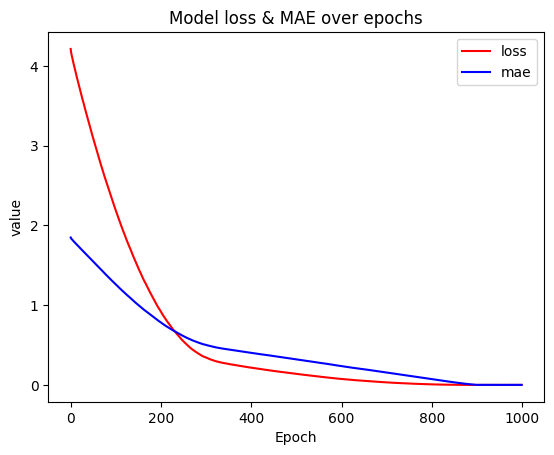

In [45]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend() #범례추가
plt.xlabel('Epoch') # 횟수
plt.ylabel('value') #오차값
plt.title('Model loss & MAE over epochs')
plt.show

In [46]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],
                        [0.01]]))

1/1 [==============================] - 0s 20ms/step


array([[0.31962383],
       [0.33762482]], dtype=float32)

In [47]:
model.save('model/after_learning.h5')

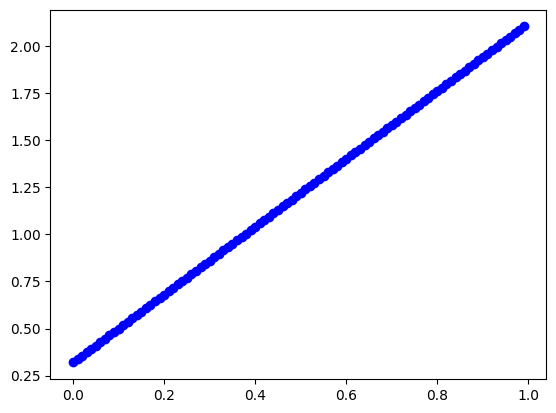

In [50]:
# 실제값 그래프 
plt.scatter(x=scaled_data_C,
            y=scaled_data_F,
            c='b')
plt.show()

In [55]:
# 예측값 그래프
y_hat = model.predict([scaled_data_C]) #2차원으로 출력
for h, y in zip(y_hat, scaled_data_F):
    print('예측값:{} , 실제값:{}, 오차:{}'.format(h[0],
                                       y,
                                       h[0]-y))

4/4 [==============================] - 0s 2ms/step
예측값:0.31962382793426514 , 실제값:0.32, 오차:-0.00037617206573486994
예측값:0.33762481808662415 , 실제값:0.33799999999999997, 오차:-0.00037518191337582163
예측값:0.35562583804130554 , 실제값:0.35600000000000004, 오차:-0.00037416195869449664
예측값:0.37362682819366455 , 실제값:0.374, 오차:-0.00037317180633544833
예측값:0.39162784814834595 , 실제값:0.392, 오차:-0.00037215185165406783
예측값:0.40962886810302734 , 실제값:0.41, 오차:-0.0003711318969726318
예측값:0.42762985825538635 , 실제값:0.428, 오차:-0.000370141744613639
예측값:0.44563084840774536 , 실제값:0.446, 오차:-0.0003691515922546462
예측값:0.46363186836242676 , 실제값:0.46399999999999997, 오차:-0.0003681316375732102
예측값:0.48163288831710815 , 실제값:0.48200000000000004, 오차:-0.0003671116828918852
예측값:0.49963387846946716 , 실제값:0.5, 오차:-0.0003661215305328369
예측값:0.5176348686218262 , 실제값:0.518, 오차:-0.0003651313781738441
예측값:0.5356358885765076 , 실제값:0.536, 오차:-0.0003641114234924636
예측값:0.553636908531189 , 실제값:0.554, 오차:-0.0003630914688110831
예측값:0.571637868

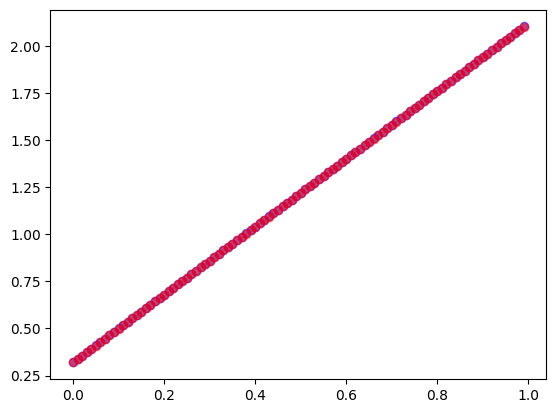

In [59]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5)
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)

## 2.2노이즈가 있는 데이터로 실습

In [79]:
np.random.seed(7)   # 동일한 랜덤값을 가지기 위한 씨드값
noise = np.random.normal(0, scale=0.1, size=100) #평균0, 표준편차 0.1개 100개 데이터 
noised_scaled_data_F = scaled_data_F + noise   #종속변수가 노이즈된것 

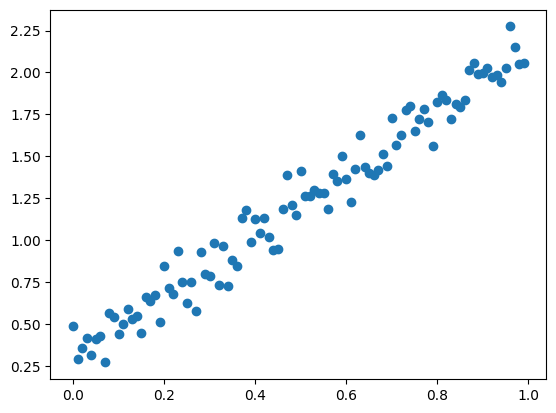

In [80]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [81]:
# 3. 모델 구성
model2 = Sequential() #모델 객체 생성
model2.add(Dense(1, input_shape=(1,)))

# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1) # 첫번째에 입력데이터, 두번째에 타켓데이터 (노이즈 된거)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5231 - mae: 0.6795
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5113 - mae: 0.6714
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5011 - mae: 0.6642
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4917 - mae: 0.6576
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4826 - mae: 0.6510
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4737 - mae: 0.6445
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4660 - mae: 0.6389
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4575 - mae: 0.6327
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4495 - mae: 0.6267
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4420 - mae: 0.6211
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - lo

4/4 [==============================] - 0s 2ms/step - loss: 0.0584 - mae: 0.1978
Epoch 89/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0561 - mae: 0.1936
Epoch 90/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0538 - mae: 0.1895
Epoch 91/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0516 - mae: 0.1854
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0501 - mae: 0.1824
Epoch 93/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.1794
Epoch 94/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0467 - mae: 0.1757
Epoch 95/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0449 - mae: 0.1724
Epoch 96/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0430 - mae: 0.1686
Epoch 97/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0413 - mae: 0.1652
Epoch 98/1000
4/4 [==============================] - 0s 2ms/step - loss: 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0937
Epoch 175/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0935
Epoch 176/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0932
Epoch 177/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0136 - mae: 0.0930
Epoch 178/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0924
Epoch 179/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0921
Epoch 180/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133 - mae: 0.0919
Epoch 181/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132 - mae: 0.0916
Epoch 182/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0912
Epoch 183/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0909
Epoch 184/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0811
Epoch 261/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0813
Epoch 262/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0813
Epoch 263/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0815
Epoch 264/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0815
Epoch 265/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0811
Epoch 266/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 267/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 268/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 269/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0808
Epoch 270/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 347/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 348/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0809
Epoch 349/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 350/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 351/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0807
Epoch 352/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 353/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0805
Epoch 354/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0802
Epoch 355/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 356/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 433/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 434/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 435/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 436/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 437/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 438/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 439/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 440/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0810
Epoch 441/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0809
Epoch 442/1000
4/4 [==============================] - 0s 1ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 519/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 520/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 521/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 522/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 523/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 524/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 525/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 526/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 527/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 528/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 605/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 606/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0810
Epoch 607/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 610/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 611/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 612/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 614/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0811
Epoch 691/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 692/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 693/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0809
Epoch 694/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 695/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 696/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 697/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 698/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 699/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0810
Epoch 700/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0808
Epoch 777/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 778/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 779/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 780/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 781/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 782/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 783/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 784/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 785/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0804
Epoch 786/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 863/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 864/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 865/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 866/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 867/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 868/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 869/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0808
Epoch 870/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 871/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0806
Epoch 872/1000
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 949/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 950/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0806
Epoch 951/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 952/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0807
Epoch 953/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 954/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 955/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0803
Epoch 956/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0805
Epoch 957/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0806
Epoch 958/1000
4/4 [==============================] - 0s 2ms/step

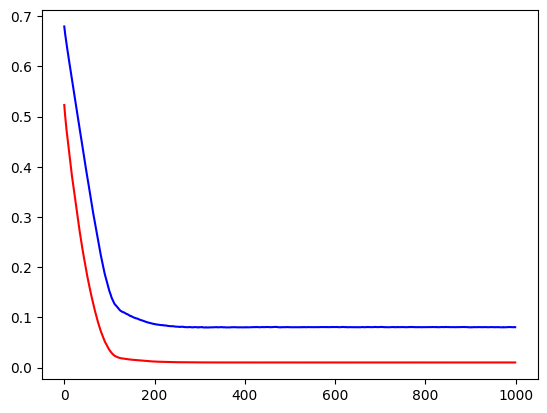

In [87]:
# 6. 학습된 모델 과정 살펴보기

plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [94]:
model2.save('model/noise_after_learning.h5')

In [90]:
#예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [91]:
for h,y in zip(y_hat, noised_scaled_data_F): #타겟변수는 noised_scaled_data_F
    print('실제값 : {}, 예측값 : {}, 오차 : {}'.format(y,
                                                    h,
                                                    h[0]-y))

실제값 : 0.48905257038003563, 예측값 : [0.30077192], 오차 : -0.18828064850694298
실제값 : 0.2914062629459167, 예측값 : [0.31917256], 오차 : 0.02776629822275395
실제값 : 0.3592820163678585, 예측값 : [0.33757323], 오차 : -0.02170878610128746
실제값 : 0.4147516282996508, 예측값 : [0.35597387], 오차 : -0.05877775873750174
실제값 : 0.31310769713742614, 예측값 : [0.37437454], 오차 : 0.061266841522623294
실제값 : 0.4102065572905948, 예측값 : [0.39277518], 오차 : -0.017431379334967356
실제값 : 0.42791096141420687, 예측값 : [0.41117585], 오차 : -0.016735114360679038
실제값 : 0.2705275693654579, 예측값 : [0.42957652], 오차 : 0.1590489467859703
실제값 : 0.5657658005663493, 예측값 : [0.44797713], 오차 : -0.11778867492166545
실제값 : 0.542049851591955, 예측값 : [0.4663778], 오차 : -0.07567205684937073
실제값 : 0.43745710260332404, 예측값 : [0.48477846], 오차 : 0.047321361237160575
실제값 : 0.5008451738804279, 예측값 : [0.5031791], 오차 : 0.0023338994533123048
실제값 : 0.5865299374196752, 예측값 : [0.52157974], 오차 : -0.06495019498803456
실제값 : 0.5278643584808353, 예측값 : [0.5399804], 오차 : 0.01211605304

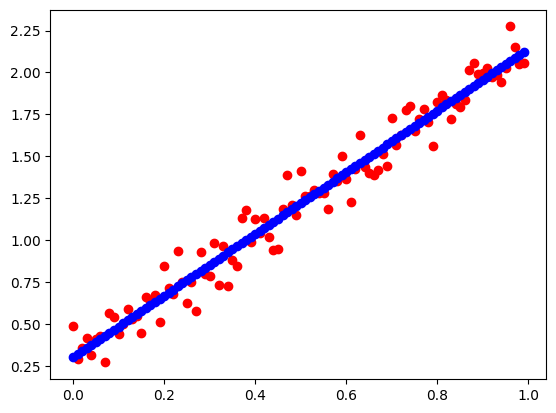

In [93]:
plt.scatter(x=scaled_data_C,
            y=noised_scaled_data_F,
            c='r') #원래값
plt.scatter(x=scaled_data_C,
            y=y_hat,
            c='b') #예측값 